## Dense Regression Example

This notebook demonstrates how to build and train a simple dense neural network for regression using the custom ML library.

In [2]:
from ml.datasets import sine_data
from ml.nn import *
from ml.losses import MeanSquareError
from ml.optimizers import Adam

import matplotlib.pyplot as plt

### Generate Synthetic Dataset

We generate a simple 1D regression dataset using a sine wave with noise.


In [3]:
x, y = sine_data(samples=300, noise_scalar=0.5, amplitude=4)

(300, 1)
(300, 1)


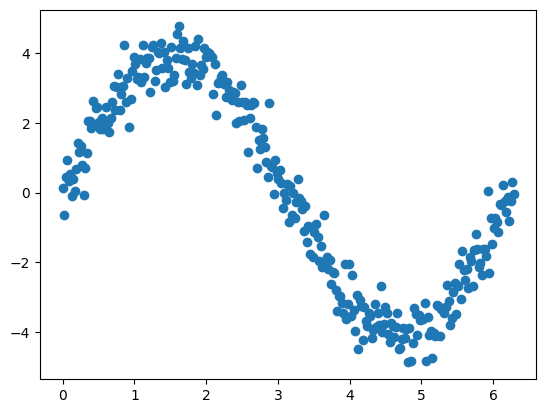

In [4]:
print(x.shape)
print(y.shape)
plt.scatter(x,y)

### Build the Model

We construct a sequential neural network model consisting of dense and activation layers. We also shows a summary for our neural network.

In [5]:
model = Model()

model.add(Dense(x.shape[1], 64))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64, 64))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64, 1))
model.add(Linear())

model.set(loss=MeanSquareError(), 
          optimizer=Adam(learning_rate=0.01),
          accuracy=AccuracyRegression())
model.finalize()
model.summary(x.shape[1])

╔════════════════════════════════════════╗
║           Model Architecture           ║
╠════╬═══════════╬══════════════╬════════╣
║ #  ║ Layer     ║ Output Shape ║ Params ║
╠════╬═══════════╬══════════════╬════════╣
║ 1  ║ Dense     ║ (None, 64)   ║    128 ║
║ 2  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 3  ║ Dense     ║ (None, 64)   ║   4160 ║
║ 4  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 5  ║ Dense     ║ (None, 1)    ║     65 ║
║ 6  ║ Linear    ║ (None, 1)    ║      0 ║
╚════╩═══════════╩══════════════╩════════╝
Total trainable parameters: 4,353


### Train the Model

We train the model on the synthetic dataset for 1000 epochs.

In [6]:
model.train(x, y, epochs=500, print_every=100)

epoch: 1
step: 0, acc: 0.003 loss: 8.136 data_loss: 8.136 reg_loss: 0.000 lr: 0.01
training, acc: 0.003 loss: 8.136 data_loss: 8.136 reg_loss: 0.000 lr: 0.01
epoch: 2
step: 0, acc: 0.003 loss: 8.126 data_loss: 8.126 reg_loss: 0.000 lr: 0.01
training, acc: 0.003 loss: 8.126 data_loss: 8.126 reg_loss: 0.000 lr: 0.01
epoch: 3
step: 0, acc: 0.000 loss: 8.080 data_loss: 8.080 reg_loss: 0.000 lr: 0.01
training, acc: 0.000 loss: 8.080 data_loss: 8.080 reg_loss: 0.000 lr: 0.01
epoch: 4
step: 0, acc: 0.000 loss: 7.980 data_loss: 7.980 reg_loss: 0.000 lr: 0.01
training, acc: 0.000 loss: 7.980 data_loss: 7.980 reg_loss: 0.000 lr: 0.01
epoch: 5
step: 0, acc: 0.003 loss: 7.792 data_loss: 7.792 reg_loss: 0.000 lr: 0.01
training, acc: 0.003 loss: 7.792 data_loss: 7.792 reg_loss: 0.000 lr: 0.01
epoch: 6
step: 0, acc: 0.000 loss: 7.493 data_loss: 7.493 reg_loss: 0.000 lr: 0.01
training, acc: 0.000 loss: 7.493 data_loss: 7.493 reg_loss: 0.000 lr: 0.01
epoch: 7
step: 0, acc: 0.007 loss: 7.089 data_loss: 

### Training Progress

Let's plot the training loss to monitor learning.

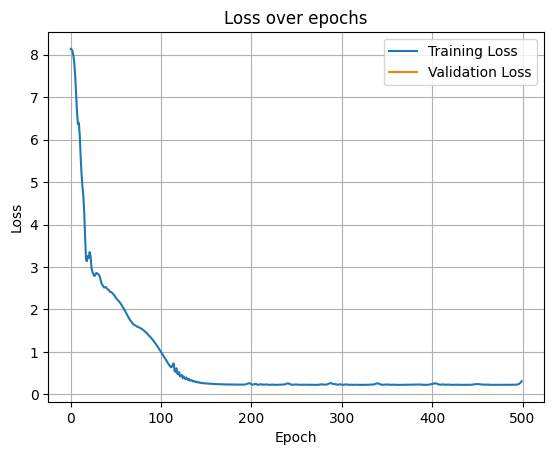

In [7]:
model.plot_loss()

### Visualize Predictions

We visualize the model's predictions against the actual values to assess performance.

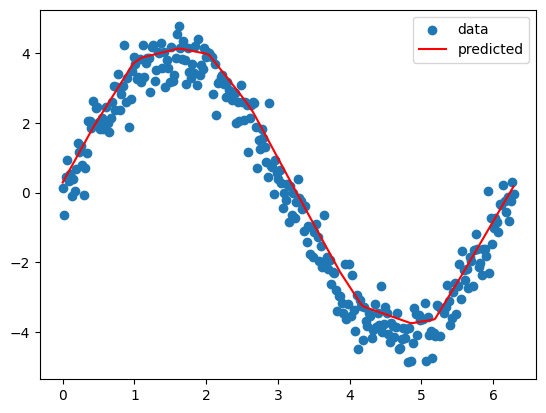

In [8]:
plt.scatter(x, y, label='data')
plt.plot(x, model.predict(x), color='red', label='predicted')
plt.legend()
